In [1]:
# 设置工作区
import os
# 设置工作目录为项目根目录
os.chdir('/home/Subjects/毕业设计/')

#### 导入makemoon查看数据分布

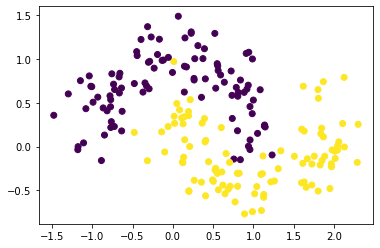

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from src.node import Node, Graph

# 生成 make_moons 数据集
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

nodes = []
index = 0
for df, label in zip(X, y):
    nodes.append(Node(df, label, index))
    index += 1
# scatter
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#### 生成图

In [3]:
# 获取图
graph = Graph(nodes)
adjacency_matrix = graph.get_adjacency_matrix()

#根据邻接矩阵获取所有的二元组，如：[(0, 1), (0, 2), (1, 2)]
edges = graph.get_edges()
print(edges)

[(0, 13), (0, 57), (0, 59), (0, 61), (0, 85), (0, 128), (0, 132), (0, 144), (0, 148), (0, 149), (0, 171), (0, 186), (0, 197), (1, 2), (1, 21), (1, 30), (1, 31), (1, 43), (1, 46), (1, 47), (1, 63), (1, 80), (1, 90), (1, 94), (1, 97), (1, 100), (1, 106), (1, 125), (1, 136), (1, 146), (1, 153), (1, 154), (1, 158), (1, 172), (1, 187), (1, 192), (1, 196), (2, 5), (2, 21), (2, 31), (2, 42), (2, 43), (2, 46), (2, 47), (2, 50), (2, 62), (2, 64), (2, 76), (2, 87), (2, 90), (2, 94), (2, 97), (2, 98), (2, 106), (2, 119), (2, 125), (2, 146), (2, 158), (2, 172), (2, 187), (2, 192), (2, 196), (3, 7), (3, 12), (3, 17), (3, 22), (3, 34), (3, 48), (3, 52), (3, 72), (3, 80), (3, 86), (3, 96), (3, 100), (3, 103), (3, 105), (3, 109), (3, 111), (3, 113), (3, 118), (3, 123), (3, 133), (3, 135), (3, 136), (3, 154), (3, 162), (3, 178), (3, 180), (3, 182), (3, 184), (4, 5), (4, 20), (4, 28), (4, 35), (4, 36), (4, 37), (4, 44), (4, 50), (4, 53), (4, 54), (4, 65), (4, 69), (4, 74), (4, 79), (4, 91), (4, 92), (4,

#### 使用deepwalk跑邻接矩阵

In [4]:
from src.deepwalk import deepwalk
nx = graph.to_nx()
# print(nx.nodes)
embeddings = deepwalk(nx)
embeddings

[[149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149], [75, 166, 121, 99, 44, 28, 183, 4, 50, 121, 93, 104, 166, 74, 121, 187, 80, 63, 72, 122, 67, 175, 15, 130, 141, 12, 38, 151, 14, 88, 126, 151, 156, 110, 12, 111, 184, 86, 72, 12, 141, 130, 193, 67, 60, 15, 160, 163, 160, 174, 168, 179, 156, 7, 122, 174, 67, 140, 151, 156], [29, 157, 115, 37, 113, 69, 113, 161, 48, 154, 100, 34, 123, 184, 100, 37, 69, 154, 100, 184, 105, 135, 161, 190, 48, 154, 1, 154, 36, 28, 74, 183, 4, 79, 20, 69, 37, 176, 109, 91, 37, 115, 102, 182, 91, 71, 54, 65, 199, 165, 107, 10, 199, 65, 74, 99, 104, 93, 117, 177], [124, 62, 94, 1, 31, 1, 31, 172, 43, 124, 46, 101, 98, 177, 131, 89, 117, 131, 98, 42, 2, 119, 73, 92, 54, 36, 176, 77, 127, 184, 180, 37, 71, 105, 17,

{'0': array([ 0.20923261,  0.10474642, -0.13611382,  0.39592373,  0.61009014,
         0.5692228 ,  0.0650849 ,  0.43391   ,  0.21735495,  0.25261164,
        -0.14765306, -0.6032541 ,  0.24059758, -0.0748616 ,  0.80901784,
        -0.21909145, -0.30764037, -0.61046416, -0.07036693, -0.2061395 ,
        -0.16382542, -0.2217363 , -0.10541555, -0.47321784,  0.07143372,
        -0.04530429,  0.4640072 ,  0.34685624,  0.20908573,  0.25364077,
        -0.0977444 ,  0.56452316], dtype=float32),
 '1': array([-0.2857433 , -0.02581362, -0.6109797 , -0.09366814, -0.23846464,
         0.15006019, -0.1728781 ,  0.68677765, -0.13579622, -0.27778476,
         0.16589545, -0.39411014,  0.23865056, -0.31493953, -0.04080853,
        -0.40446648,  0.07068075, -0.29219455, -0.45928317, -0.69000334,
        -0.22161447,  0.51966816, -0.38306737,  0.02468859, -0.47788313,
        -0.15608938,  0.10047866,  0.10214246,  0.24571547,  0.00566609,
        -0.21580657, -0.00189828], dtype=float32),
 '2': array(

#### 取出embedding前两维，做可视化

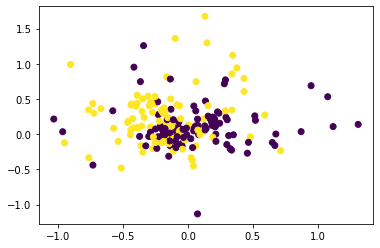

In [5]:
# 随便取两个维度看看
x = [embedding[0] for embedding in list(embeddings.values())]
y = [embedding[1] for embedding in list(embeddings.values())]



label = [node.label for node in nodes]

# 创建散点图
plt.scatter(x, y, c=label)

# 显示图形
plt.show()